#**LAB 7 : Regression Part 2**

In this Lab we will look into the shortcomings of Linear Regression and see how those problems can be solved using Logistic Regression. We will also explore Polynomian Regression

  1. Polynomial Regression
  2. Linear Regression on a specific pattern of data to observe shortcomings
  3. Logistic Regression to solve those problems

In [114]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10, 7)

#Polynomial Regression

1. Generate data using relation $y=0.25x^{3}+1.25x^{2}-3x-3$
2. Corrupt y by adding random noise (uniformly sampled)
3. Fit the generated curve using different polynomial order. (Using matrix inversion and gradient descent)

In [115]:
## Use the Regression class defined in the previous lab
class regression:
  # Constructor
  def __init__(self, name='reg'):
    self.name = name  # Create an instance variable

  def grad_update(self, w_old, lr, y, x):
    w = w_old.flatten() + 2 * lr * (x @ (np.subtract(y, (x.T@w_old).flatten())))/x.shape[1]
    w = w.reshape((w.shape[0], 1))
    return w

  def error(self,w,y,x):
    temp = np.sum((y - (x.T@w).flatten())**2)/x.shape[1]
    return temp

  def mat_inv(self, y, x_aug):
    return np.linalg.pinv(x_aug @ x_aug.T) @ x_aug @ y
    
  # By Gradien descent

  def Regression_grad_des(self, x, y, lr):
    
    w_old = np.random.uniform(0, 1, (x.shape[0], 1))
    err = []
    for i in range(int(1e9)):
      
      w_pred = self.grad_update(w_old, lr, y, x)
      err.append(self.error(w_pred, y, x))
      
      dev = np.linalg.norm(np.subtract(w_pred, w_old), ord=1)
      if dev<=0.000001:
        break
      
      w_old = w_pred

    w_pred = w_old
    return w_pred, err


(100, 1) (1, 100)
Optimal Weights: [[14.85165132]]
(100, 1) (2, 100)
Optimal Weights: [[14.85165132]
 [ 2.5065597 ]]
(100, 1) (3, 100)
Optimal Weights: [[-0.6418368]
 [ 2.5065597]
 [ 1.2655572]]
(100, 1) (4, 100)
Optimal Weights: [[-0.6418368 ]
 [-2.79515064]
 [ 1.2655572 ]
 [ 0.24062125]]
(100, 1) (5, 100)
Optimal Weights: [[-5.22193431e-01]
 [-2.79515064e+00]
 [ 1.23296582e+00]
 [ 2.40621251e-01]
 [ 1.03563254e-03]]


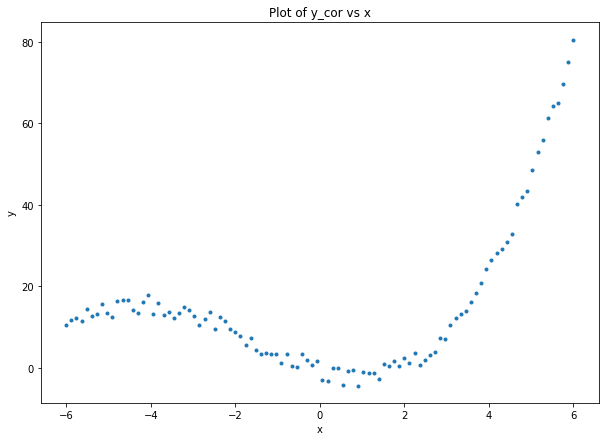

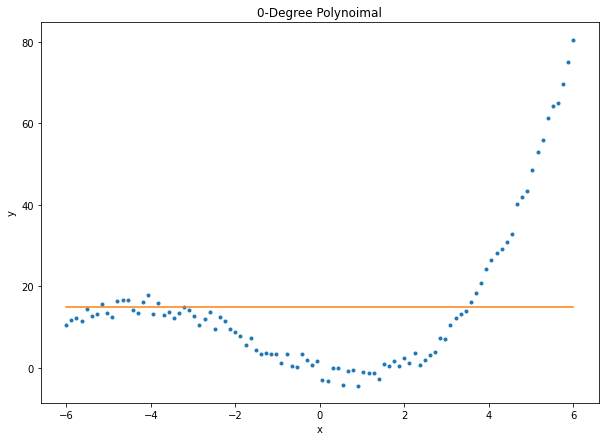

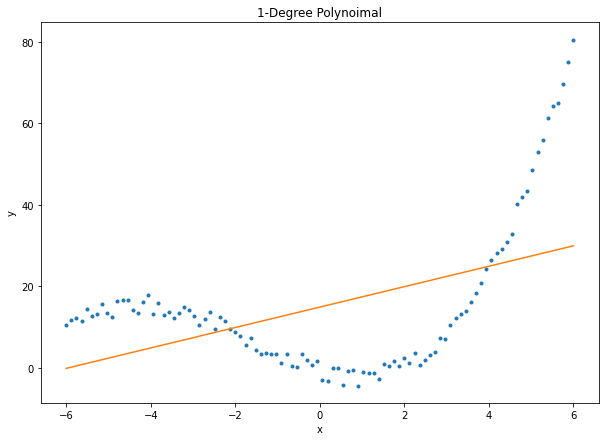

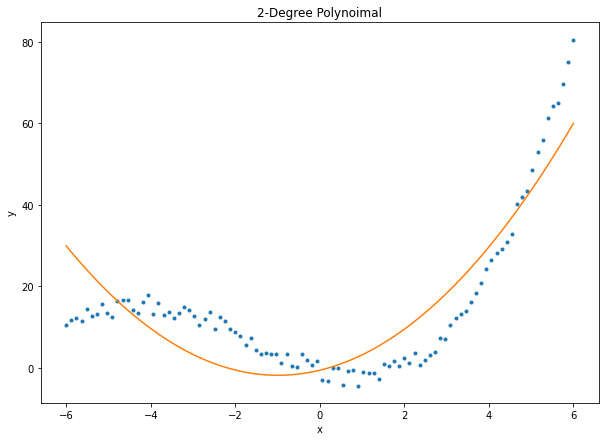

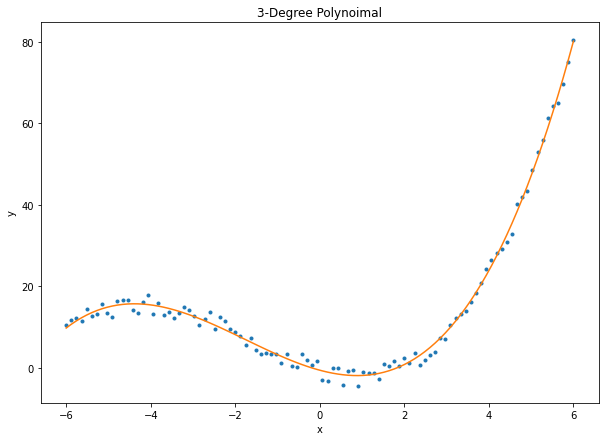

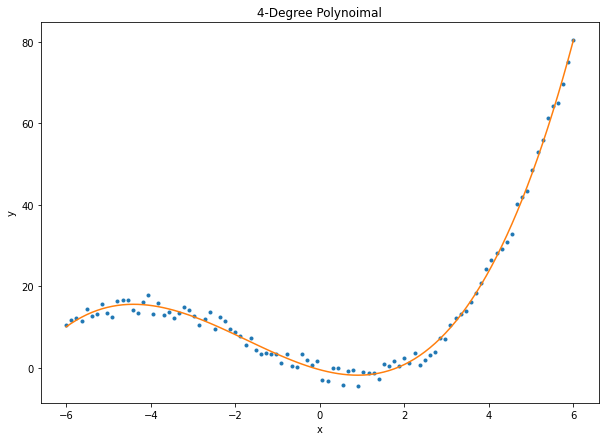

In [116]:
## Data generation

x=np.linspace(-6,6,100)
x=x[np.newaxis,:]

w = np.array([-3, -3, 1.25, 0.25]) ## Define Weights as per the given equation

## Function to transform the data into polynomial

def data_transform(X,degree): 

  if degree==0:
    return np.ones((1, X.shape[1]))
  
  X_new = np.ones(X.shape[1])
  for d in range(degree):
    temp_data = np.power(X.T.flatten(), d+1)
    X_new = np.vstack((X_new, temp_data))

  return X_new


X = data_transform(x,3)

y = X.T @ w

y = y+5*np.random.uniform(0,1,y.shape)

plt.figure(figsize=(10, 7))
plt.plot(x.T,y,'.')
plt.xlabel("x")
plt.ylabel("y")
plt.title("Plot of y_cor vs x")

reg=regression()


def mat_solver(degree):
  X_1 = data_transform(x, degree)
  print(y.reshape(y.shape[0], 1).shape, X_1.shape)
  w_mat = reg.mat_inv(y.reshape(y.shape[0], 1), X_1)
  y_pred=X_1.T @ w_mat
  print("Optimal Weights:", w_mat)
  plt.figure(figsize=(10, 7))
  plt.plot(x.T,y,'.')
  plt.plot(x.T,y_pred)
  plt.title(f'{degree}-Degree Polynoimal')
  plt.xlabel("x")
  plt.ylabel("y")

# Code for degree 0 polynomial fitting

mat_solver(0)

# Write the code for degree 1 polynomial fitting

mat_solver(1)

# Write the code for degree 2 polynomial fitting

mat_solver(2)

# Write the code for degree 3 polynomial fitting

mat_solver(3)

# Write the code for degree 4 polynomial fitting

mat_solver(4)


(1, 100) (100,)
Optimal Weights: [[14.8516467]]
(2, 100) (100,)
Optimal Weights: [[14.85160231]
 [ 2.5065597 ]]
(3, 100) (100,)
Optimal Weights: [[-0.64075912]
 [ 2.5065597 ]
 [ 1.26550821]]
(4, 100) (100,)
Optimal Weights: [[-0.6310522 ]
 [-2.79515063]
 [ 1.26506693]
 [ 0.24062125]]
(5, 100) (100,)
Optimal Weights: [[-3.55645727e-02]
 [-2.62467719e+00]
 [ 1.17028995e+00]
 [ 2.34119477e-01]
 [ 2.58080686e-03]]


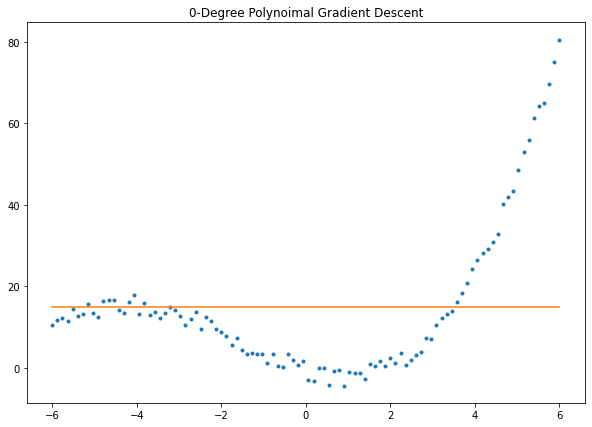

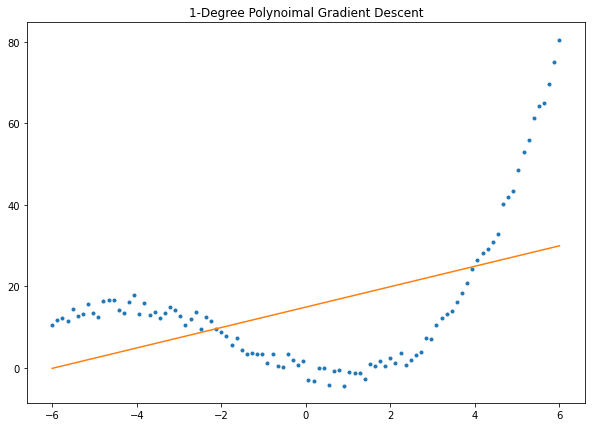

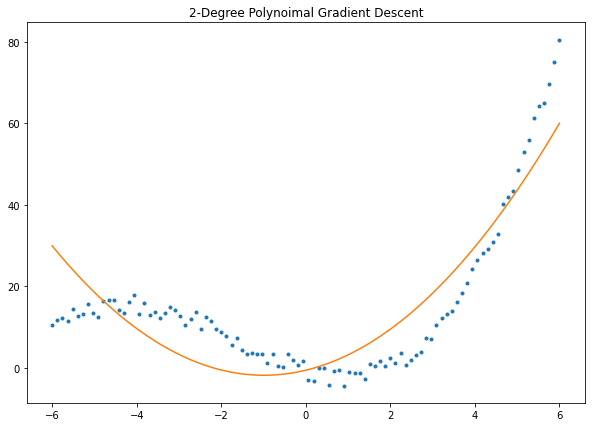

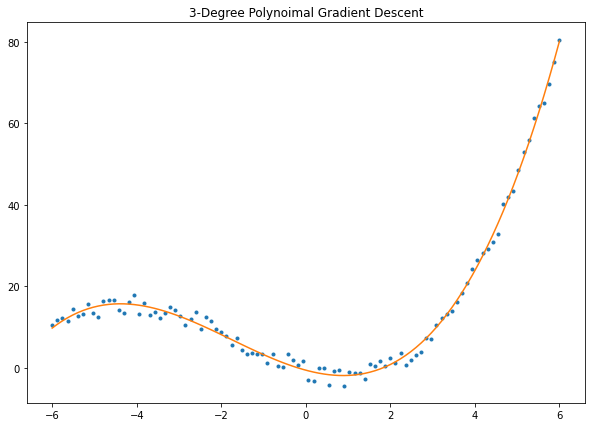

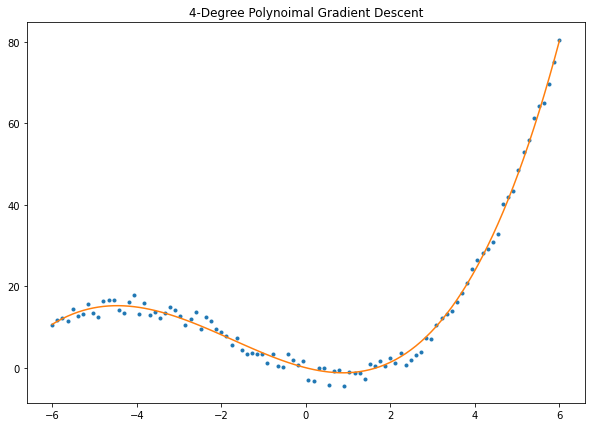

In [117]:
# By Gradient Descent 

## Write your code here

def grad_solver(degree, lr):
  X_1 = data_transform(x, degree)
  print(X_1.shape, y.shape)
  w_grad, _ = reg.Regression_grad_des(X_1, y, lr)
  y_pred = X_1.T @ w_grad
  print("Optimal Weights:", w_grad)
  plt.figure(figsize=(10, 7))
  plt.plot(x.T,y,'.')
  plt.plot(x.T,y_pred)
  plt.title(f'{degree}-Degree Polynoimal Gradient Descent')
  
# Code for degree 0 polynomial fitting

grad_solver(0, 0.1)

# Write the code for degree 1 polynomial fitting

grad_solver(1, 0.01)

# Write the code for degree 2 polynomial fitting

grad_solver(2, 0.001)

# Write the code for degree 3 polynomial fitting

grad_solver(3, 1e-4)

# Write the code for degree 4 polynomial fitting

grad_solver(4, 1e-6)

# Linear Regression

  Generate the data as shown in the figure below


(200,)
(200,)


Text(0.5, 1.0, 'Plot of y vs x')

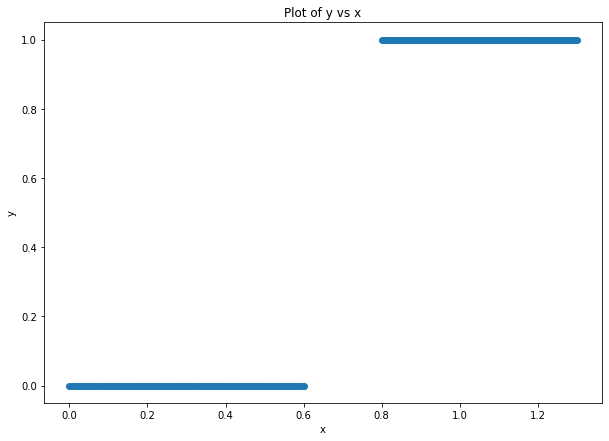

In [118]:
## Write your code here
x = np.append(np.linspace(0, 0.6, 100), np.linspace(0.8, 1.3, 100))
print(x.shape)
y = (x>0.7).astype('float32')
print(y.shape)

plt.figure(figsize=(10., 7))
plt.scatter(x, y)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Plot of y vs x")

  Use the Regression class defined in the previous lab to fit the curve

In [119]:
## Write your Code here
reg = regression("lin")

  Augment the Data and generate optimal weights

In [120]:
## Write your Code here
x = x[np.newaxis,:]
X = data_transform(x, 1)
print("Shape of x :",  x.shape)
print("Shape of Augmented x :",  X.shape)

Shape of x : (1, 200)
Shape of Augmented x : (2, 200)


Using the optimal weights, fit the curve

(2, 200) (200,)


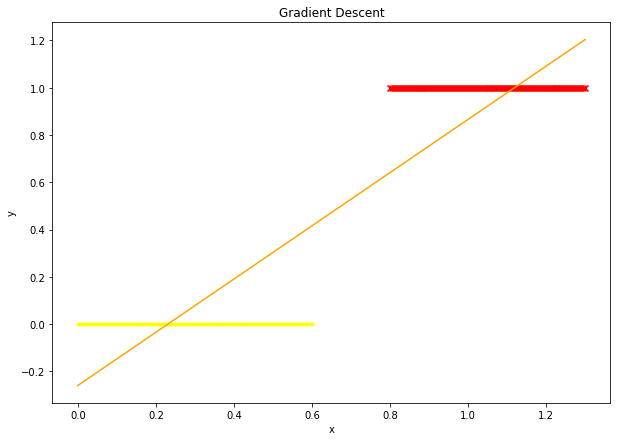

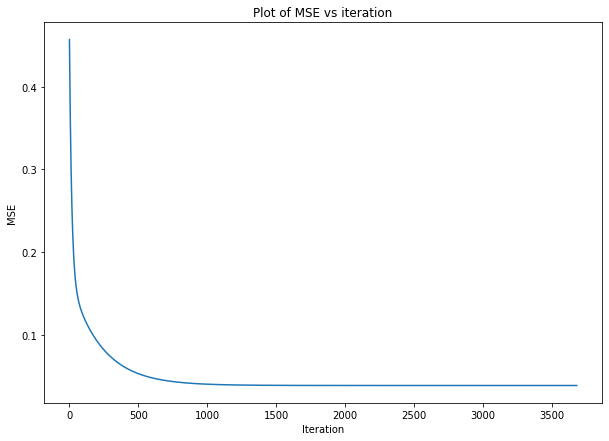

In [121]:
## Write your Code here
print(X.shape, y.shape)
w_grad, err = reg.Regression_grad_des(X, y, 0.01)
y_pred = (X.T @ w_grad).flatten()


low_inds = y_pred<0.5
high_inds = y_pred>=0.5

plt.figure(figsize=(10, 7))
plt.scatter(x.T.flatten()[low_inds], y[low_inds], marker='.', c='yellow')
plt.scatter(x.T.flatten()[high_inds], y[high_inds], marker='x', c='red')
plt.plot(x.T, y_pred, c='orange')
plt.title('Gradient Descent')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

plt.figure(figsize=(10, 7))
plt.plot(err)
plt.title("Plot of MSE vs iteration")
plt.xlabel("Iteration")
plt.ylabel("MSE")
plt.show()

# Drawback of Linear regression based Classificaton

  Generate the Data as shown in the figure and follow the same steps as above to fit a curve using regression class 

(300,)
(300,)


Text(0.5, 1.0, 'Plot of y vs x')

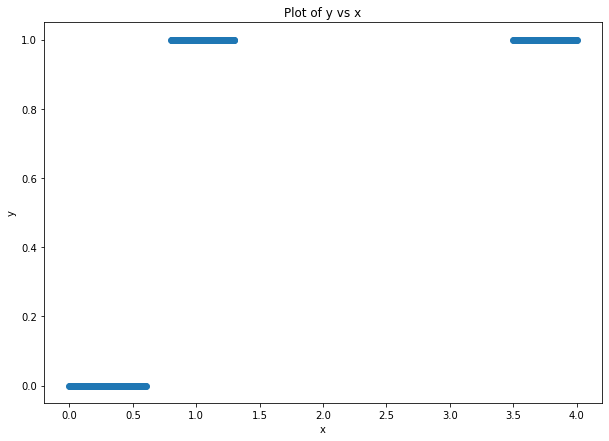

In [122]:
## Write your code here
x = np.concatenate((np.linspace(0, 0.6, 100), np.linspace(0.8, 1.3, 100), np.linspace(3.5, 4, 100)))
print(x.shape)
y = (x>0.7).astype('float32')
print(y.shape)

plt.figure(figsize=(10., 7))
plt.scatter(x, y)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Plot of y vs x")

In [123]:
reg = regression("lin")
x = x[np.newaxis,:]
X = data_transform(x, 1)
print("Shape of x :",  x.shape)
print("Shape of Augmented x :",  X.shape)

Shape of x : (1, 300)
Shape of Augmented x : (2, 300)


(2, 300) (300,)


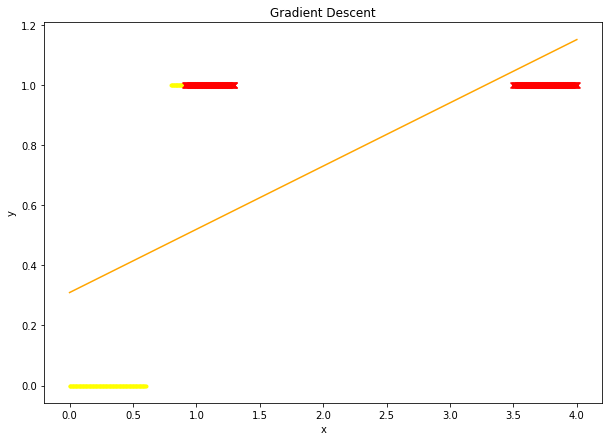

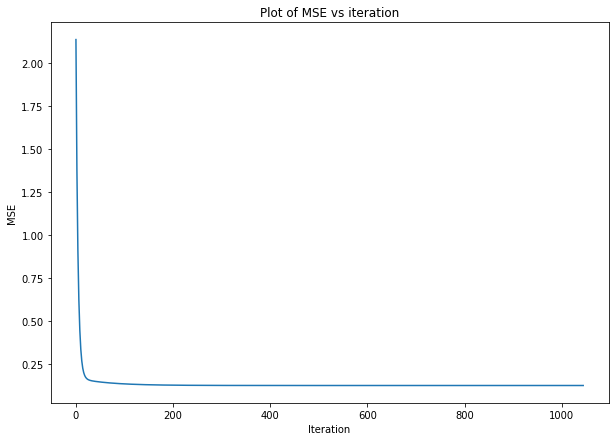

In [124]:
## Write your code here
print(X.shape, y.shape)
w_grad, err = reg.Regression_grad_des(X, y, 0.01)
y_pred = (X.T @ w_grad).flatten()


low_inds = y_pred<0.5
high_inds = y_pred>=0.5

plt.figure(figsize=(10, 7))
plt.scatter(x.T.flatten()[low_inds], y[low_inds], marker='.', c='yellow')
plt.scatter(x.T.flatten()[high_inds], y[high_inds], marker='x', c='red')
plt.plot(x.T, y_pred, c='orange')
plt.title('Gradient Descent')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

plt.figure(figsize=(10, 7))
plt.plot(err)
plt.title("Plot of MSE vs iteration")
plt.xlabel("Iteration")
plt.ylabel("MSE")
plt.show()

# Logistic regression

  Error Surface (Comparison between Logistic Loss and Mean Squared Error)

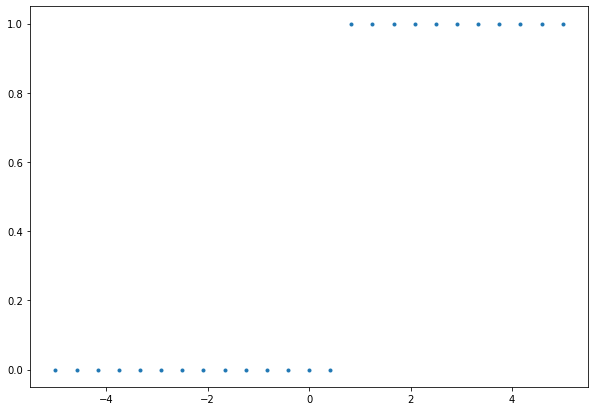

In [125]:
import numpy as np
import matplotlib.pyplot as plt


x=np.linspace(-5,5,25)
y=np.zeros(x.shape)
y[np.where(x>0.7314)]=1

plt.plot(x,y,'.')

1. MSE=$\frac{1}{2N}\sum_{i=1}^{N}(y^{p}_{i}-y_{i})^2$, where $y^{p}=\frac{1}{1+e^{-w^{T}x}}$
2. Logistic loss=$-\frac{1}{N}\sum_{i=1}^{N}y_{i}log(y^{p}_{i})+(1-y_{i})log(1-y_{i}^{p})$

In [126]:
def sigmoid(x):
  return 1/(np.exp(-x) + 1)

# search space (only w1 is searched, where as w0 is fixed)
w1_in=10/(x[1]-x[0])
w0=-w1_in*0.7314
w1=np.linspace(-w1_in,4*w1_in,100)

x = x[np.newaxis,:]
X = data_transform(x, 1)
X.shape

(2, 25)

In [127]:
cost_fn_mse=[]
cost_fn_logis=[]
N = X.shape[1]
for i in range(w1.shape[0]):
  # Compute Mean square error and logistic loss using cost function
  # Write your code here
  w = np.array([w0, w1[i]], dtype='float')
  y_pred = sigmoid(X.T@w)
  mse_err = np.sum(np.subtract(y_pred, y)**2)/(2*N)
  log_error = -np.sum( np.multiply(y, np.log(y_pred+1e-20)) + np.multiply(1-y, np.log(1-y_pred+1e-20)) )/N
  cost_fn_mse.append(mse_err)
  cost_fn_logis.append(log_error)
  

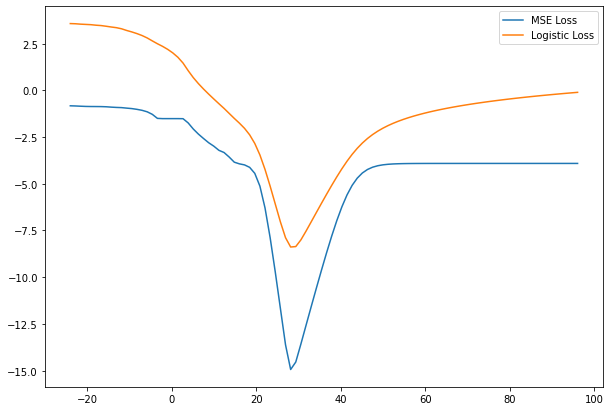

In [128]:
# Ploting of error surface
plt.figure()
plt.plot(w1,np.log(cost_fn_mse),label='MSE Loss')
plt.plot(w1,np.log(cost_fn_logis),label = 'Logistic Loss')
plt.legend()

**Solving the Outlier Issue**

  Generate the Data as shown in the figure

(300,)
(300,)


Text(0.5, 1.0, 'Plot of y vs x')

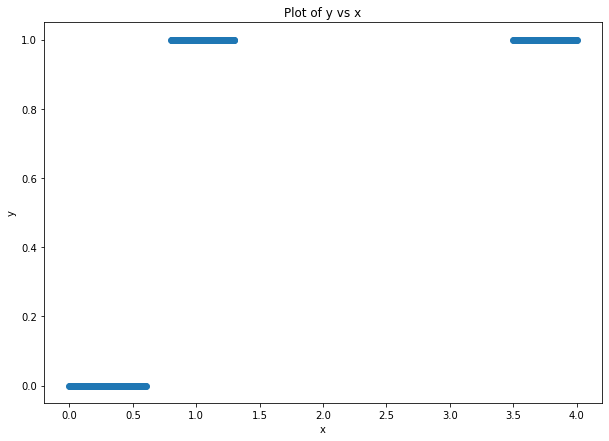

In [129]:
## Write your code here
x = np.concatenate((np.linspace(0, 0.6, 100), np.linspace(0.8, 1.3, 100), np.linspace(3.5, 4, 100)))
print(x.shape)
y = (x>0.7).astype('float32')
print(y.shape)

plt.figure(figsize=(10., 7))
plt.scatter(x, y)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Plot of y vs x")

Define a Logistic Regression class

In [130]:
class logis_regression:
  # Constructor
  def __init__(self, name='reg'):
    self.name = name  # Create an instance variable

  def logis(self,x,w_old):
    
    op = (x.T@w_old).flatten()
    op = 1/(np.exp(-op) + 1)
    return op

  def grad_update(self,w_old,lr,y,x):
    y_pred = self.logis(x, w_old)
    w = w_old + lr * (x @ ( y - y_pred ))/x.shape[1]
    return w

  def error(self,w,y,x):
    y_pred = self.logis(x, w)
    N = x.shape[1]
    return -np.sum( np.multiply(y, np.log(y_pred+1e-20)) + np.multiply(1-y, np.log(1-y_pred+1e-20)) )/N

  def Regression_grad_des(self,x,y,lr):
    
    err = []
    prev_err = float('inf')
    w = np.random.uniform(size=(x.shape[0], ))
    for i in range(1000):
      
      w = self.grad_update(w, lr, y, x)
      
      curr_err = self.error(w, y, x)
      
      err.append(curr_err)

      dev=np.abs(prev_err - curr_err)
          
      if dev<=10**(-20):
        break
      
      prev_err = curr_err

    return w, err

Augment the data and fit the curve by obtaining optimal weights (Using Gradient Descent)

In [131]:
reg = logis_regression("log")
x = x[np.newaxis,:]
X = data_transform(x, 1)
print("Shape of x :",  x.shape)
print("Shape of Augmented x :",  X.shape)

Shape of x : (1, 300)
Shape of Augmented x : (2, 300)


(2, 300) (300,)
Optimal Weights: [-2.91030944  4.53515034]


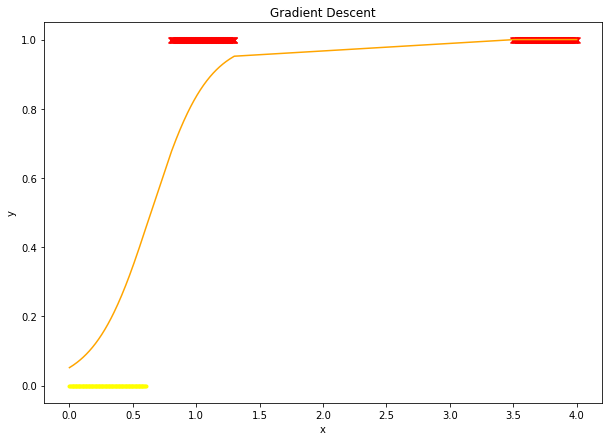

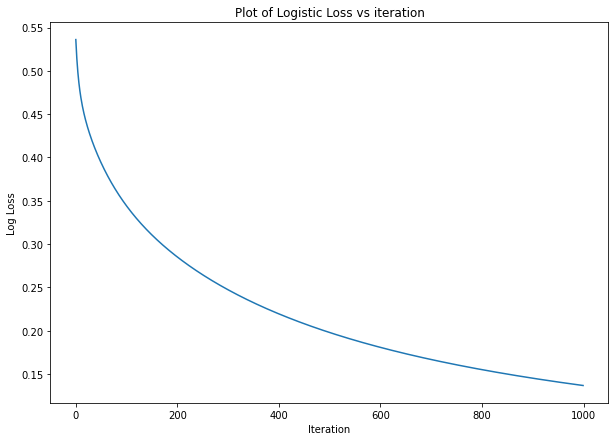

In [132]:
## Write your code here
print(X.shape, y.shape)
w_grad, err = reg.Regression_grad_des(X, y, 0.1)

print("Optimal Weights:", w_grad)

y_pred = sigmoid((X.T @ w_grad).flatten())


low_inds = y_pred<0.5
high_inds = y_pred>=0.5

plt.figure(figsize=(10, 7))
plt.scatter(x.T.flatten()[low_inds], y[low_inds], marker='.', c='yellow')
plt.scatter(x.T.flatten()[high_inds], y[high_inds], marker='x', c='red')
plt.plot(x.T, y_pred, c='orange')
plt.title('Gradient Descent')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

plt.figure(figsize=(10, 7))
plt.plot(err)
plt.title("Plot of Logistic Loss vs iteration")
plt.xlabel("Iteration")
plt.ylabel("Log Loss")
plt.show()

# Classification of circularly separated data using logistic regression



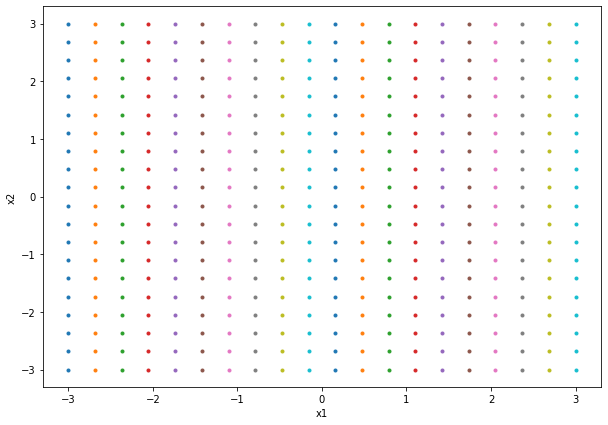

In [133]:
x1=np.linspace(-3,3,20)
x2=np.linspace(-3,3,20)

x11,x22=np.meshgrid(x1,x2)
plt.plot(x11,x22,'.')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

  Using the above data generate circular data

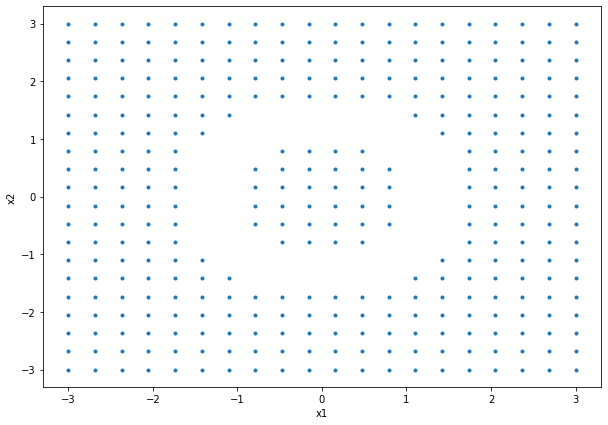

In [134]:
x11_f = x11.flatten()
x22_f = x22.flatten()

X = np.vstack((x11_f, x22_f))

dist = np.sqrt(np.linalg.norm(X, axis=0, ord=2))

indices = np.logical_or(dist>=1.3, dist<=1)

X = X.T[indices]
y = (dist>=1.3)[indices].astype('float')

plt.plot(X[:, 0], X[:, 1], '.')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

As in case of circularly separated data, the boundary is nonlinear, so squared feature is taken.

(3, 344) (344,)
Optimal Weights: [-2.04063798  1.48819584  1.49258447]


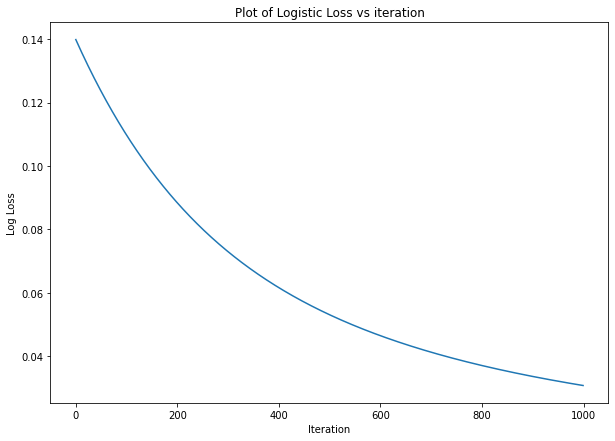

In [135]:
# perform logistic regression
reg = logis_regression('log')

ones = np.ones((1, X.shape[0]))
X_t = np.append(ones, X.T**2, axis=0)

print(X_t.shape, y.shape)
w_grad, err = reg.Regression_grad_des(X_t, y, 0.1)

print("Optimal Weights:", w_grad)


plt.figure(figsize=(10, 7))
plt.plot(err)
plt.title("Plot of Logistic Loss vs iteration")
plt.xlabel("Iteration")
plt.ylabel("Log Loss")
plt.show()

Plot classification using 0.5 as threshold

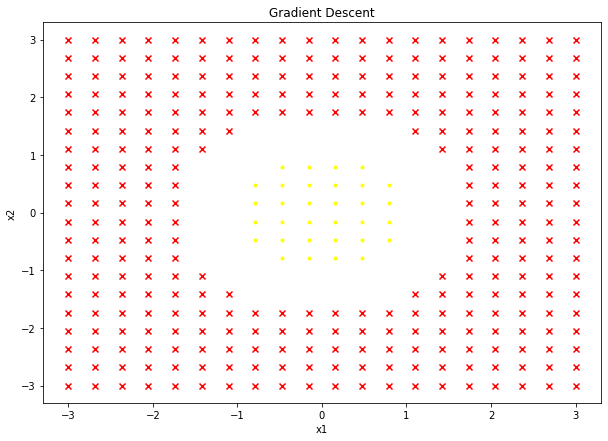

In [136]:
threshold = 0.5

y_pred = sigmoid((X_t.T @ w_grad).flatten())

low_inds = y_pred<threshold
high_inds = y_pred>=threshold

plt.figure(figsize=(10, 7))
plt.scatter(X[low_inds, 0], X[low_inds, 1], marker='.', c='yellow')
plt.scatter(X[high_inds, 0], X[high_inds, 1], marker='x', c='red')
plt.title('Gradient Descent')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()


# Multiclass logistic regression

1. Generate 1D data with 3 classes


### One vs rest classification

1. Lets take a polynomial of order 2 (by seeing the data distribution)

(300,)


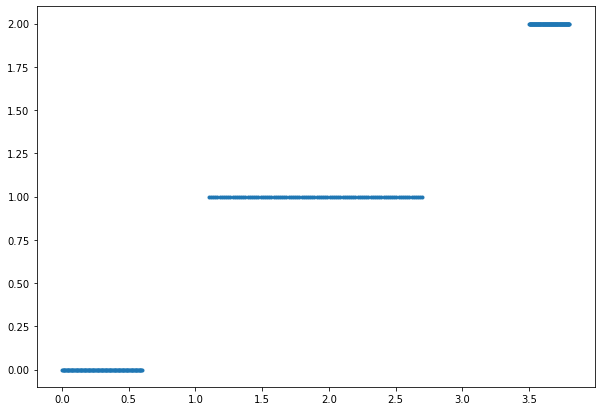

In [137]:
## Write your code here

import numpy as np
import matplotlib.pyplot as plt

x1=np.linspace(0,0.6,100)
x2=np.linspace(1.1,2.7,100)
x3=np.linspace(3.5,3.8,100)

x=np.concatenate((x1,x2,x3))
print(x.shape)

y1=np.zeros(x1.shape)
y2=np.ones(x2.shape)
y3=np.tile([2],x3.shape)

y=np.concatenate((y1,y2,y3))

plt.figure()
plt.plot(x,y,'.')


In [138]:
# def data_transform(X,degree): 
#   X_new=[]      
#   for i in range(degree +1):
#     # write code here to generate a polynomial

def data_transform(X,degree): 
  X_new=[]      
  for i in range(degree +1):
    X_new.append(X**i)              
  X_new = np.concatenate(X_new)  
  return X_new

x_aug=data_transform(x[np.newaxis,:],2)
x_aug.shape


(3, 300)

In [139]:
# plot for classification
def plot_op(x,y_pred):

  ind0,_=np.where(y_pred<0.5)
  ind1,_=np.where(y_pred>=0.5)
  x0=x[ind0,:]
  x1=x[ind1,:]
  plt.plot(x0,np.zeros((x0).shape),'o',color='y')
  plt.plot(x1,np.ones((x1).shape),'x',color='r')
  

Using the above function for plotting, plot the curve using different configurations

In [140]:
def one_vs_three(x, x_aug, y, zero_class) :  
    y_t = (y!=zero_class).astype('float')
    reg = logis_regression('log')


    print(x_aug.shape, y_t.shape)
    w_grad, err = reg.Regression_grad_des(x_aug, y_t, 0.1)

    print("Optimal Weights:", w_grad)


    plt.figure(figsize=(10, 7))
    plt.plot(err)
    plt.title("Plot of Logistic Loss vs iteration")
    plt.xlabel("Iteration")
    plt.ylabel("Log Loss")
    plt.show()

    y_pred = sigmoid((x_aug.T @ w_grad).flatten())


    low_inds = y_pred<0.5
    high_inds = y_pred>=0.5

    plt.figure(figsize=(10, 7))
    plt.scatter(x[low_inds], y_t[low_inds], marker='.', c='yellow')
    plt.scatter(x[high_inds], y_t[high_inds], marker='x', c='red')
    plt.plot(x.T, y_pred, c='orange')
    plt.title('Gradient Descent')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()
    return w_grad, y_pred

(3, 300) (300,)
Optimal Weights: [-3.38913693  1.04183832  2.63225835]


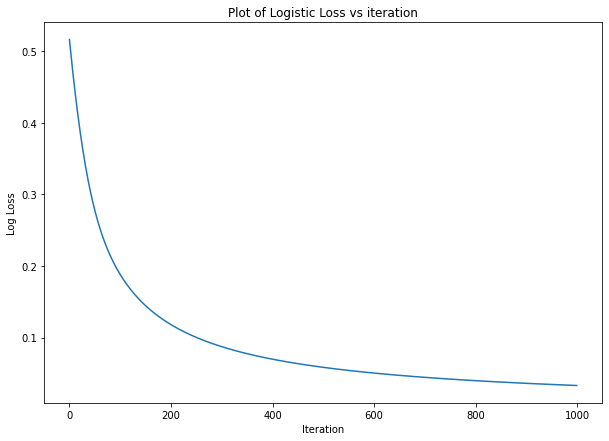

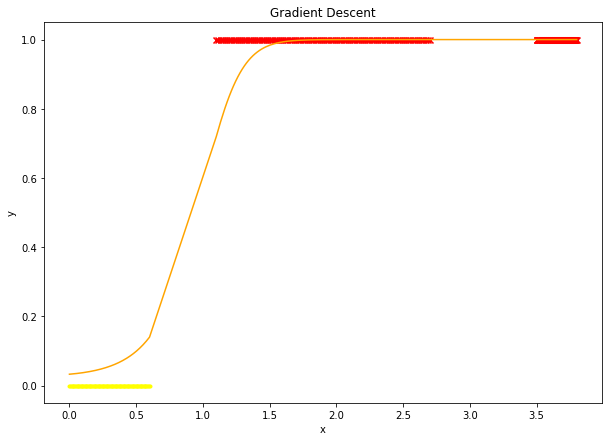

In [141]:
# take class 0 as '0' and other to '1'
## Write your code here
w0, y_pred0 = one_vs_three(x, x_aug, y, 0)

(3, 300) (300,)
Optimal Weights: [ 3.04532355 -5.2627262   1.42978527]


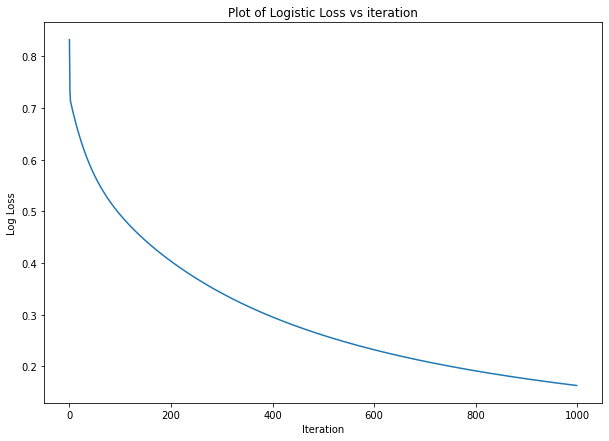

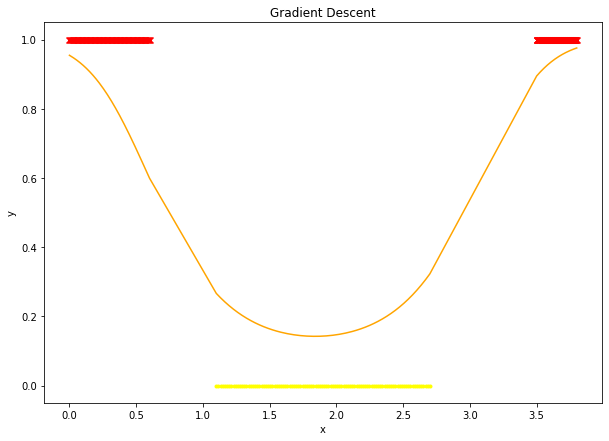

In [142]:
# take class 1 as '0' and other to '1'
## Write your code here

w1, y_pred1 = one_vs_three(x, x_aug, y, 1)

(3, 300) (300,)
Optimal Weights: [ 3.77473175  3.0502484  -1.44316436]


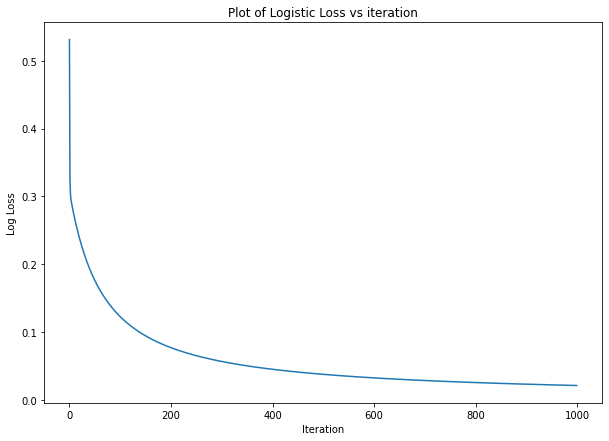

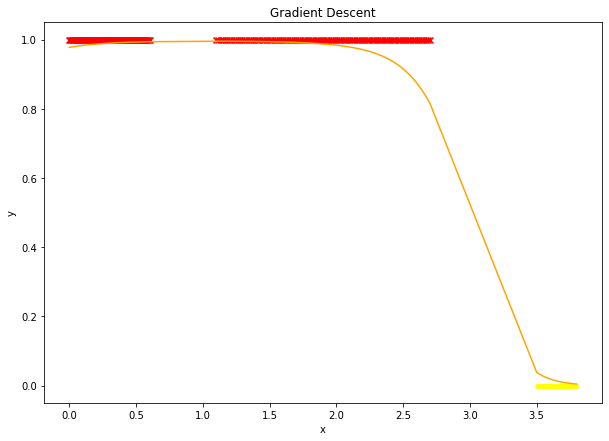

In [143]:
# Take class 2 as '0' and other to '1'
## Write your code here
w2, y_pred2 = one_vs_three(x, x_aug, y, 2)

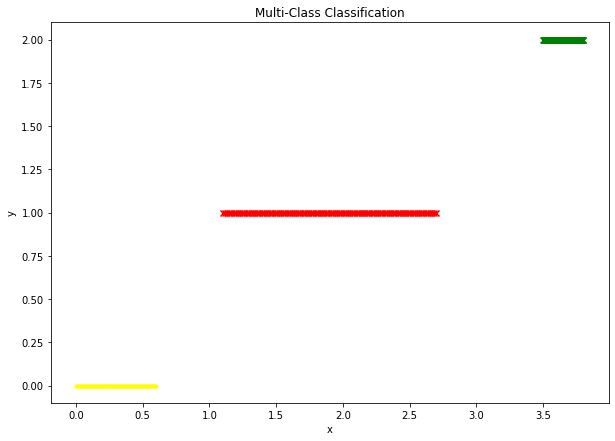

In [144]:
# final classification
## Write your code here

Y = np.vstack([y_pred0, y_pred1, y_pred2])
Y = np.argmin(Y, axis=0)

plt.figure(figsize=(10, 7))
plt.scatter(x[Y==0], Y[Y==0], marker='.', c='yellow')
plt.scatter(x[Y==1], Y[Y==1], marker='x', c='red')
plt.scatter(x[Y==2], Y[Y==2], marker='x', c='green')
plt.title('Multi-Class Classification')
plt.xlabel('x')
plt.ylabel('y')
plt.show()